In [1]:
import pandas as pd # to show the data and modify it
import numpy as np # add and multiplication
import matplotlib.pyplot as plt #plotting
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('Mall_Customers.csv')
print("Dataset Head: ")
print(df.head())
print("\nDataset Info: ")
print(df.info())
print("\nDataset Description: ")
print(df.describe())


FileNotFoundError: [Errno 2] No such file or directory: 'Mall_Customers.csv'

In [ ]:
# Selecting the columns for clustering
X= df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
wcss = []
silhouette_scores = []
k_range = range(2,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init ='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    if k >= 2:
      score = silhouette_score(X_scaled, kmeans.labels_)
      silhouette_scores.append(score)

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.xticks(k_range)

plt.tight_layout()
plt.show()

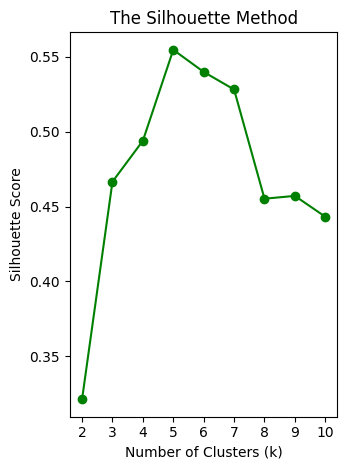

In [ ]:
plt.subplot(1,2,2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method')
plt.xticks(k_range)

plt.tight_layout()
plt.show()

In [ ]:
optimal = 5
kmeans_final = KMeans(n_clusters=optimal, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans_final.fit_predict(X_scaled)

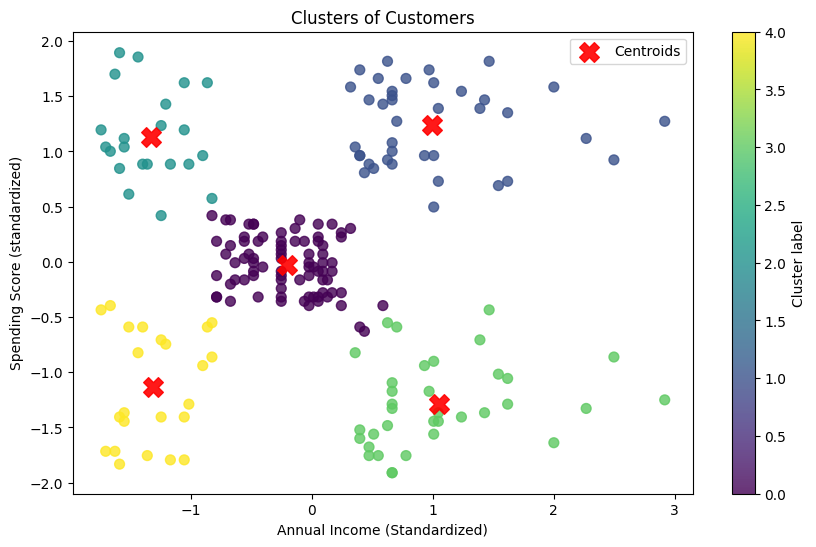

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, s=50, cmap='viridis', alpha = 0.8)
centers = kmeans_final.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.9, marker='X', label= 'Centroids')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (standardized)')
plt.title('Clusters of Customers')
plt.legend()
plt.colorbar(scatter, label='Cluster label')
plt.show()

In [ ]:
df['Cluster'] = y_kmeans

In [ ]:
print("\nCluster Analysis - Mean Values: ")
cluster_means = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_means)


Cluster Analysis - Mean Values: 
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


In [ ]:
print('\nNumber of Customers in Each Cluster: ')
cluster_counts = df['Cluster'].value_counts().sort_index()
print(cluster_counts)


Number of Customers in Each Cluster: 
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


In [ ]:
print('\nGender Distribution in Each Cluster: ')
gender_distribution = df.groupby('Cluster')['Gender'].value_counts()
print(gender_distribution)


Gender Distribution in Each Cluster: 
Cluster  Gender
0        Female    48
         Male      33
1        Female    21
         Male      18
2        Female    13
         Male       9
3        Male      19
         Female    16
4        Female    14
         Male       9
Name: count, dtype: int64


In [ ]:
print("\n=== CLUSTER PROFILES ===")
for cluster_id in range(optimal):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}: {len(cluster_data)} customers)")
    print(f"  - Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"  - Average Annual Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k") # Added the missing '}'
    print(f"  - Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}/100")
    print(f"  - Gender Distribution: {cluster_data['Gender'].value_counts()}")


=== CLUSTER PROFILES ===

Cluster 0: 81 customers)
  - Average Age: 42.7 years
  - Average Annual Income: $55.3k
  - Average Spending Score: 49.5/100
  - Gender Distribution: Gender
Female    48
Male      33
Name: count, dtype: int64

Cluster 1: 39 customers)
  - Average Age: 32.7 years
  - Average Annual Income: $86.5k
  - Average Spending Score: 82.1/100
  - Gender Distribution: Gender
Female    21
Male      18
Name: count, dtype: int64

Cluster 2: 22 customers)
  - Average Age: 25.3 years
  - Average Annual Income: $25.7k
  - Average Spending Score: 79.4/100
  - Gender Distribution: Gender
Female    13
Male       9
Name: count, dtype: int64

Cluster 3: 35 customers)
  - Average Age: 41.1 years
  - Average Annual Income: $88.2k
  - Average Spending Score: 17.1/100
  - Gender Distribution: Gender
Male      19
Female    16
Name: count, dtype: int64

Cluster 4: 23 customers)
  - Average Age: 45.2 years
  - Average Annual Income: $26.3k
  - Average Spending Score: 20.9/100
  - Gender Di

In [ ]:
centers_orginal_scale = scaler.inverse_transform(kmeans_final.cluster_centers_)
print("\nCluster Centroids (Orginal Scale): ")
centroids_df = pd.DataFrame(centers_orginal_scale, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(centroids_df)


Cluster Centroids (Orginal Scale): 
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


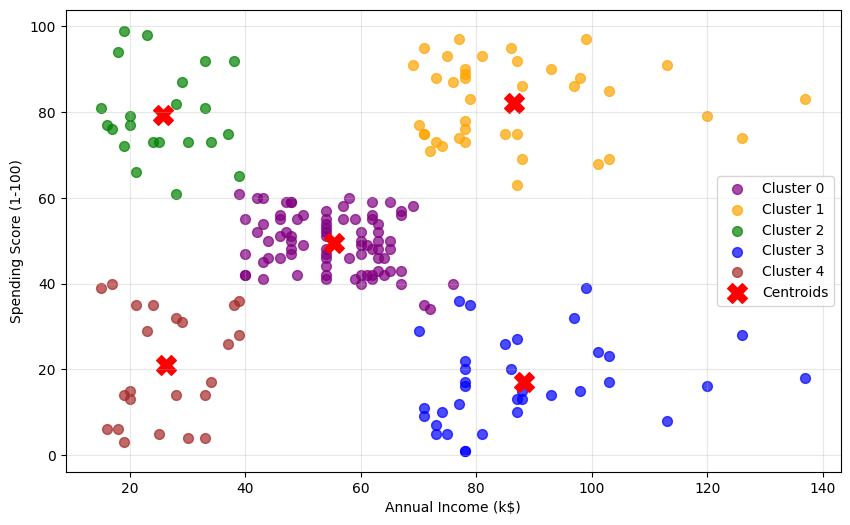

In [ ]:
plt.figure(figsize=(10,6))
colors = ['purple', 'orange', 'green', 'blue', 'brown']
for i in range(optimal):
  plt.scatter(df[df['Cluster'] == i]['Annual Income (k$)'], df[df['Cluster'] == i]['Spending Score (1-100)'], s=50, c=colors[i], label=f'Cluster {i}', alpha = 0.7)


plt.scatter(centroids_df['Annual Income (k$)'], centroids_df['Spending Score (1-100)'], c='red', s=200, marker='X', label= 'Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()